## Feature Selection Techniques

In [1]:
import pandas as pd
df = pd.read_csv('./datasets/mobile_dataset.csv')

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [4]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [6]:
X.shape

(2000, 20)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
ordered_rank_features = SelectKBest(score_func = chi2, k = 20) 
ordered_feature = ordered_rank_features.fit(X, Y)

In [9]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7f5aa1236c20>)

In [10]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [11]:
ordered_feature.scores_.reshape(len(ordered_feature.scores_))

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
feature_rank = pd.DataFrame(ordered_feature.scores_, index = X.columns)

In [13]:
feature_rank

,0
battery_power,14129.866576
blue,0.723232
clock_speed,0.648366
dual_sim,0.631011
fc,10.135166
four_g,1.521572
int_memory,89.839124
m_dep,0.745820
mobile_wt,95.972863
n_cores,9.097556


In [14]:
feature_rank.nlargest(10, 0)

,0
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863
int_memory,89.839124
sc_w,16.480319
talk_time,13.236400
fc,10.135166
sc_h,9.614878


## Feature Importance

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.06038464 0.02028389 0.03345125 0.01987113 0.03277866 0.01790683
 0.03591778 0.03286476 0.0370013  0.03265032 0.03377286 0.04712754
 0.04875657 0.39128325 0.03415796 0.03511428 0.03494015 0.01436991
 0.0174496  0.01991734]


<AxesSubplot:>

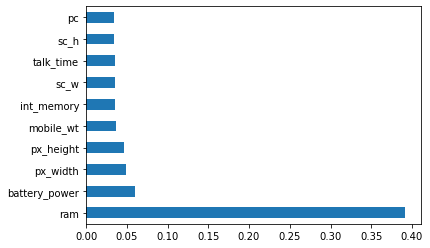

In [17]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)
ranked_features.nlargest(10).plot(kind = 'barh')

## Correlation

In [18]:
import seaborn as sns
corr = X.corr()

In [19]:
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


<AxesSubplot:>

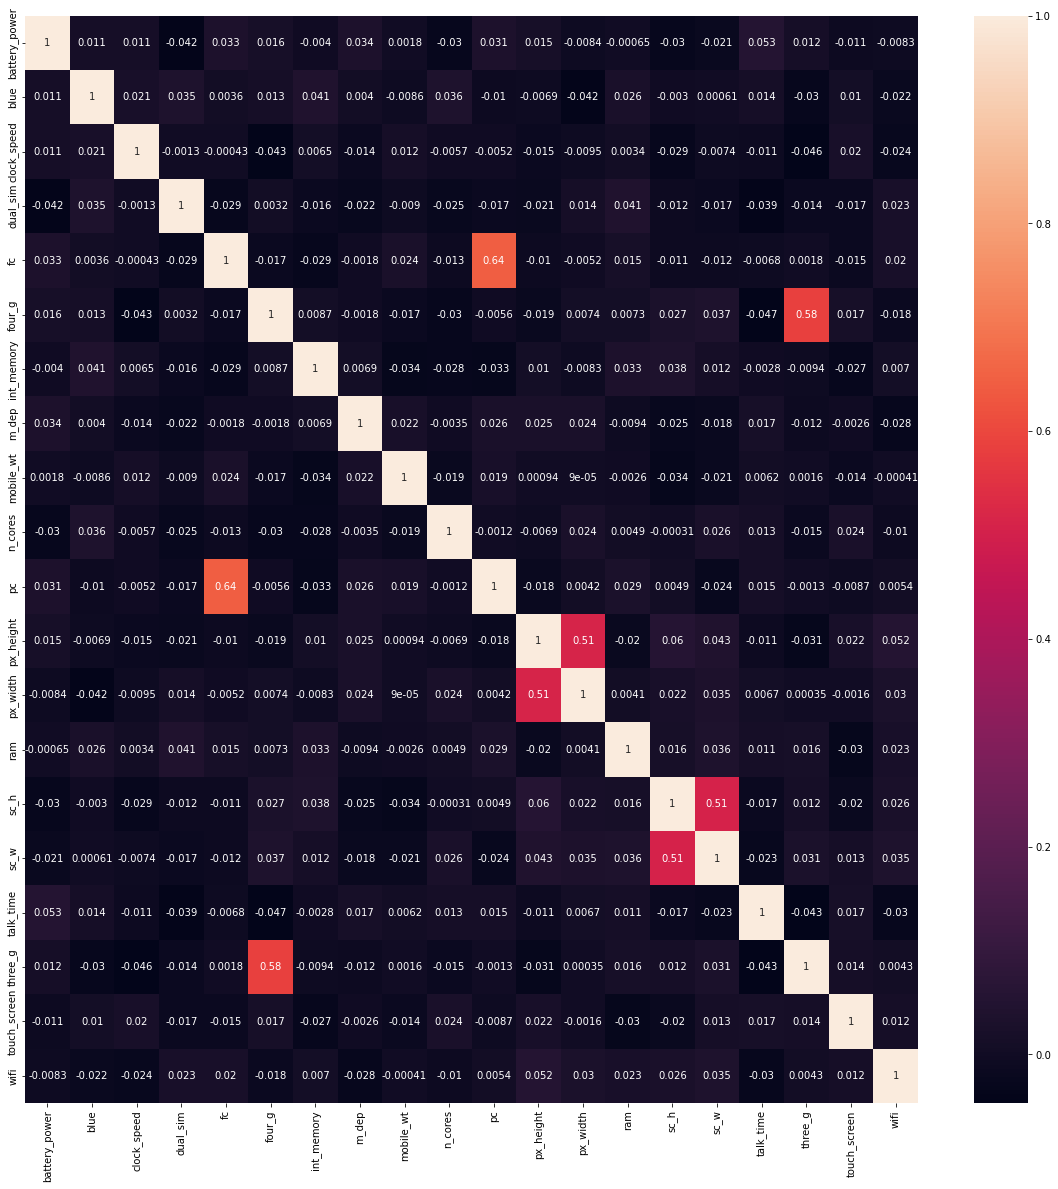

In [20]:
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)

## Information Gain

In [21]:
from sklearn.feature_selection import mutual_info_classif

In [22]:
mutual_info = mutual_info_classif(X, Y)

In [23]:
mutual_info

array([0.03062828, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00646714, 0.        , 0.01417095, 0.01525446,
       0.        , 0.03181649, 0.02549322, 0.84634075, 0.        ,
       0.01714132, 0.        , 0.        , 0.        , 0.00805201])

In [24]:
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data.sort_values(ascending = False)

ram              0.846341
px_height        0.031816
battery_power    0.030628
px_width         0.025493
sc_w             0.017141
n_cores          0.015254
mobile_wt        0.014171
wifi             0.008052
int_memory       0.006467
m_dep            0.000000
blue             0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
sc_h             0.000000
clock_speed      0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
pc               0.000000
dtype: float64

## Variance Threshold

- Feature selector that removes all low-variance features
- This should be only applied on input features
- use fit method on train data and transform method on test data

In [25]:
import pandas as pd

data = pd.DataFrame({'A':[1,2,5,7,4],
                    'B':[3,6,3,7,1],
                    'C':[1,1,1,1,1],
                    'D':[0,0,0,0,0]})

In [26]:
data

,A,B,C,D
0,1,3,1,0
1,2,6,1,0
2,5,3,1,0
3,7,7,1,0
4,4,1,1,0


In [27]:
from sklearn.feature_selection import VarianceThreshold
model = VarianceThreshold(threshold = 0)
model.fit(data)

VarianceThreshold(threshold=0)

In [28]:
a = map(model.get_support(), data.columns)

In [29]:
data.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
zer_variance = [column for column in data.columns if column not in data.columns[model.get_support()]]

In [31]:
zer_variance

['C', 'D']

In [32]:
data.columns[model.get_support()]

Index(['A', 'B'], dtype='object')

## Using Correlation

In [33]:
#importing data and libraries
import pandas as pd
from sklearn.datasets import load_boston


In [34]:
data = load_boston()

In [35]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [38]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

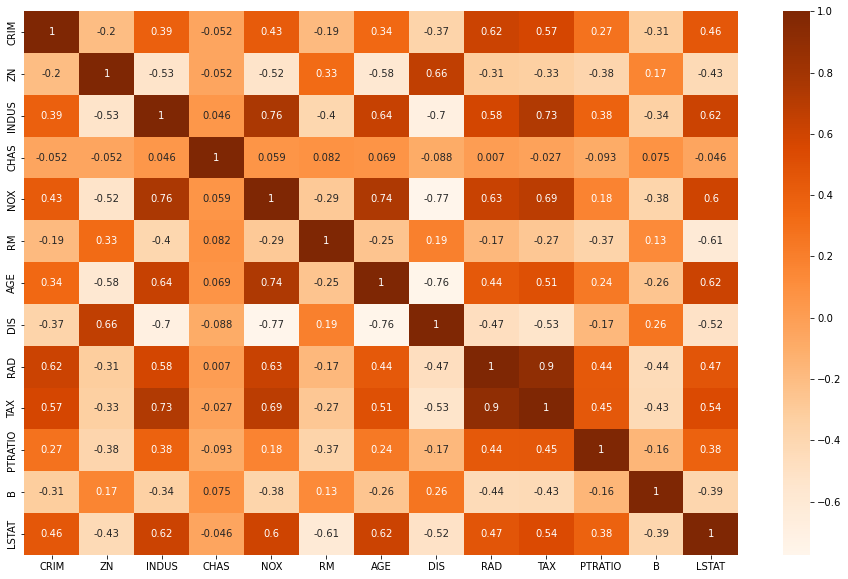

In [41]:
plt.figure(figsize = (16,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.Oranges)
plt.show()

In [42]:
## Collecting the names of columns having correlation greater than a certain threshold

def corr_columns(dataset, threshold):
    col_corr = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = corr_columns(X_train, 0.7)
len(set(corr_features))

4

In [45]:
corr[corr > 0.7]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,NaN,0.755708,NaN,NaN,NaN,NaN,0.729234,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.755708,NaN,1.000000,NaN,0.743524,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,0.743524,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.902384,NaN,NaN,NaN
TAX,NaN,NaN,0.729234,NaN,NaN,NaN,NaN,NaN,0.902384,1.000000,NaN,NaN,NaN
